# WEEK 4 PART 2

Name: MUSA T GANIYU

Course: DATA 620 (Web Analytics)

Assignment Title: High Frequency Words


# Instructions:

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

4. Identify the 200 highest frequency words in this corpus.

5. Create a graph that shows the relative frequency of these 200 words.

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”



In [318]:
rm(list =ls())

Kindly install and load the following libraries is you've not already done so.

In [391]:
suppressMessages(library(RTextTools))
suppressMessages(library(e1071))
suppressMessages(library(SnowballC))
suppressMessages(library(wordcloud))
suppressMessages(library(tm))

suppressMessages(library(rpart))
suppressMessages(library(rpart.plot))
suppressMessages(library(e1071))
suppressMessages(library(nnet))

These links lead to the site where some of the text files used here is found:

In [363]:
url1 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/master/negative/cv000_29416.txt"
url2 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/master/positive/cv000_29590.txt"

The above files are seperate text for negative review/comments and positive as well. The two files would be analysed separately and as well as combined text.

In [364]:
neg <- readLines(url1) #Load the text file and obtain the head and class
head(neg)
class(neg)

[1] "plot : two teen couples go to a church party , drink and then drive . "                                                          
[2] "they get into an accident . "                                                                                                    
[3] "one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . "                              
[4] "what's the deal ? "                                                                                                              
[5] "watch the movie and \" sorta \" find out . . . "                                                                                 
[6] "critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . "

[1] "character"

* NB: 

neg = Negative Text

pos = positive Text

Before we can continue with the analysis, we have to convert it to a Corpus file for easy coding!

In [365]:
neg_cleaning = Corpus(VectorSource(neg))


* Cleaning of the files after converting is crucial! So, lets begin!!!!

In [366]:
neg_cleaning = tm_map(neg_cleaning, content_transformer(tolower))
neg_cleaning = tm_map(neg_cleaning, removeNumbers)
neg_cleaning = tm_map(neg_cleaning, removePunctuation)
neg_cleaning = tm_map(neg_cleaning, removeWords, c("the", "and", stopwords("english")))
neg_cleaning = tm_map(neg_cleaning, stripWhitespace)

inspect(neg_cleaning[1])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] plot two teen couples go church party drink drive 


In [367]:
dtm <- DocumentTermMatrix(neg_cleaning) # Converting to Matrix Document
dtm

<<DocumentTermMatrix (documents: 35, terms: 251)>>
Non-/sparse entries: 322/8463
Sparsity           : 96%
Maximal term length: 14
Weighting          : term frequency (tf)


* NB

You may wanna try this too!

neg_g = gsub("[[:punct:]]", "", neg)

neg_g = gsub("[[:digit:]]", "", neg)

neg_g = gsub("http\\w+", "", neg)

neg_g = gsub("[ \t]{2,}", "", neg)

neg_g = gsub("^\\s+|\\s+$", "", neg)

In [368]:
inspect(dtm[, ]) #inspecting the document

<<DocumentTermMatrix (documents: 35, terms: 251)>>
Non-/sparse entries: 322/8463
Sparsity           : 96%
Maximal term length: 14
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs even film films get just make movie one pretty teen
  12    0    0     0   0    0    0     0   0      0    0
  13    0    1     1   1    0    0     0   0      0    0
  17    0    1     0   0    0    2     0   0      0    0
  18    1    0     0   0    0    1     0   0      0    0
  19    0    0     0   0    1    0     1   0      0    0
  25    0    0     0   0    0    1     1   0      1    1
  26    0    0     0   0    1    0     0   0      1    0
  28    0    1     0   0    0    0     0   0      2    0
  35    0    0     0   0    0    0     0   0      0    0
  7     1    0     2   0    1    0     0   2      0    0


In [ ]:
* Second Text File

NB: We adopt the above method analysis used for negatic for the positive as well.And do same for their combined data files.

In [369]:
pos <- readLines(url2)
head(pos)

[1] "films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . "
[2] "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . "                                                                                             
[3] "to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . "                                                                                                                   
[4] "the book ( or \" graphic novel , \" if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . "                                                                                                                             
[5] "in other words , don't dismiss this film because of its source . "                                                                                                                                                                                                         
[6] "if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . "

In [370]:
pos_cleaning = Corpus(VectorSource(pos))
pos_cleaning

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 25

In [371]:
pos_cleaning = tm_map(pos_cleaning, content_transformer(tolower))
pos_cleaning = tm_map(pos_cleaning, removeNumbers)
pos_cleaning = tm_map(pos_cleaning, removePunctuation)
pos_cleaning = tm_map(pos_cleaning, removeWords, c("the", "and", stopwords("english")))
pos_cleaning =  tm_map(pos_cleaning, stripWhitespace)

inspect(pos_cleaning[1])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] films adapted comic books plenty success whether theyre superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world theres never really comic book like hell 


In [372]:
dtm2 <- DocumentTermMatrix(pos_cleaning)
dtm2

<<DocumentTermMatrix (documents: 25, terms: 341)>>
Non-/sparse entries: 399/8126
Sparsity           : 95%
Maximal term length: 15
Weighting          : term frequency (tf)

In [373]:
inspect(dtm2[, ])

<<DocumentTermMatrix (documents: 25, terms: 341)>>
Non-/sparse entries: 399/8126
Sparsity           : 95%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs book campbell comic dont film hells like moore ripper say
  1     1        0     2    0    0     0    1     0      0   0
  10    0        0     0    0    0     0    0     0      0   0
  12    0        0     0    0    0     0    0     0      0   1
  13    0        1     0    1    0     0    0     1      1   1
  14    0        0     1    1    0     0    0     0      1   0
  18    0        0     0    0    1     1    2     0      0   0
  19    0        0     1    1    1     0    0     0      0   1
  2     0        1     0    0    0     0    0     1      0   0
  6     1        0     1    0    0     1    0     0      0   0
  7     0        0     0    0    1     0    0     0      0   0


In [393]:
dtm = removeSparseTerms(dtm, 0.99)
dtm

<<DocumentTermMatrix (documents: 35, terms: 251)>>
Non-/sparse entries: 322/8463
Sparsity           : 96%
Maximal term length: 14
Weighting          : term frequency (tf)

In [375]:
dtm2 = removeSparseTerms(dtm2, 0.97)
dtm2

<<DocumentTermMatrix (documents: 25, terms: 341)>>
Non-/sparse entries: 399/8126
Sparsity           : 95%
Maximal term length: 15
Weighting          : term frequency (tf)

In [376]:
inspect(dtm[1,1:22])

<<DocumentTermMatrix (documents: 1, terms: 22)>>
Non-/sparse entries: 8/14
Sparsity           : 64%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs accident church couples drink drive get party plot teen two
   1        0      1       1     1     1   0     1    1    1   1


In [377]:
inspect(dtm2[1,1:20])

<<DocumentTermMatrix (documents: 1, terms: 20)>>
Non-/sparse entries: 20/0
Sparsity           : 0%
Maximal term length: 11
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs adapted arthouse batman book books casper comic crowd films geared
   1       1        1      1    1     1      1     2     1     1      1


Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

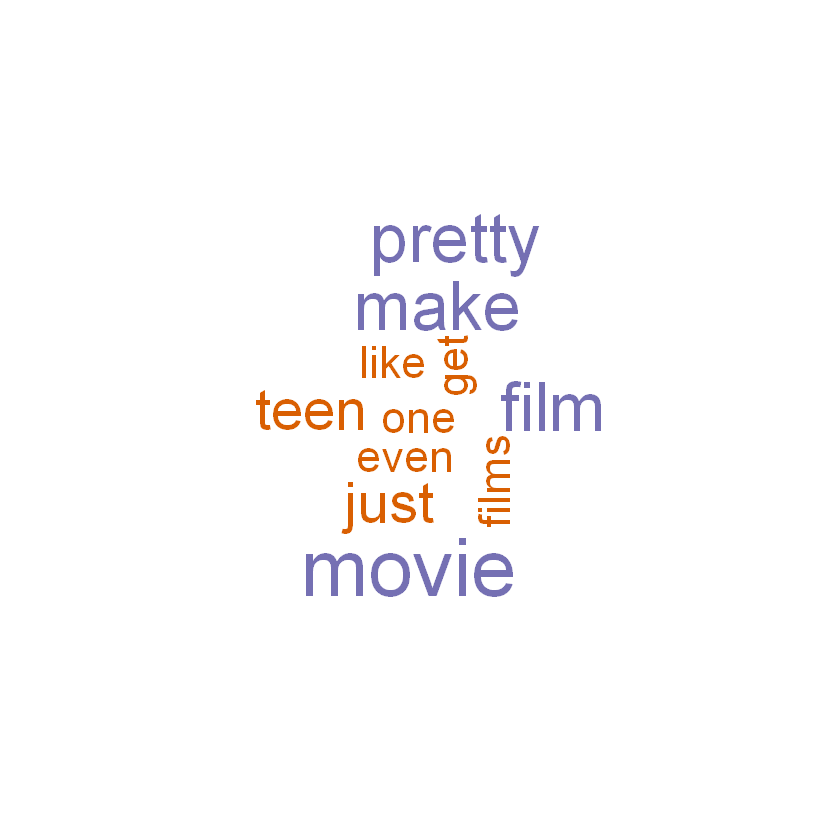

In [394]:
freq = data.frame(sort(colSums(as.matrix(dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

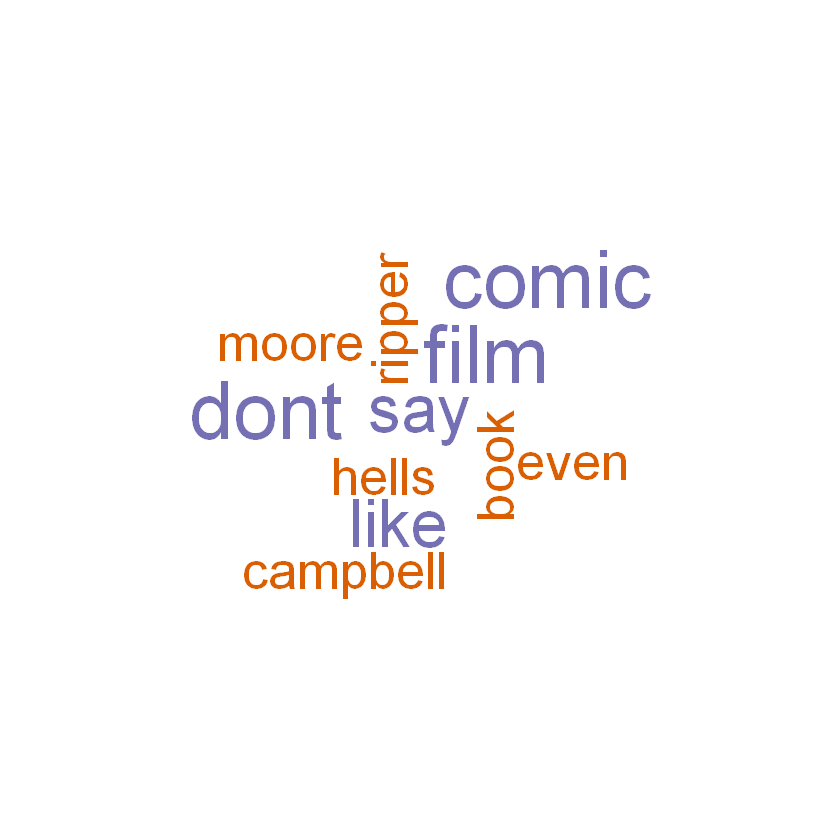

In [395]:
freq2 = data.frame(sort(colSums(as.matrix(dtm2)), decreasing=TRUE))
wordcloud(rownames(freq2), freq2[,1], max.words=150, colors=brewer.pal(1, "Dark2"))

In [396]:
neg_weighting <- DocumentTermMatrix(neg_cleaning, control = list(weighting = weightTfIdf))
neg_weighting <- removeSparseTerms(neg_weighting, 0.90)
neg_weighting

Warning message in weighting(x):
"empty document(s): 33"

<<DocumentTermMatrix (documents: 35, terms: 6)>>
Non-/sparse entries: 27/183
Sparsity           : 87%
Maximal term length: 6
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

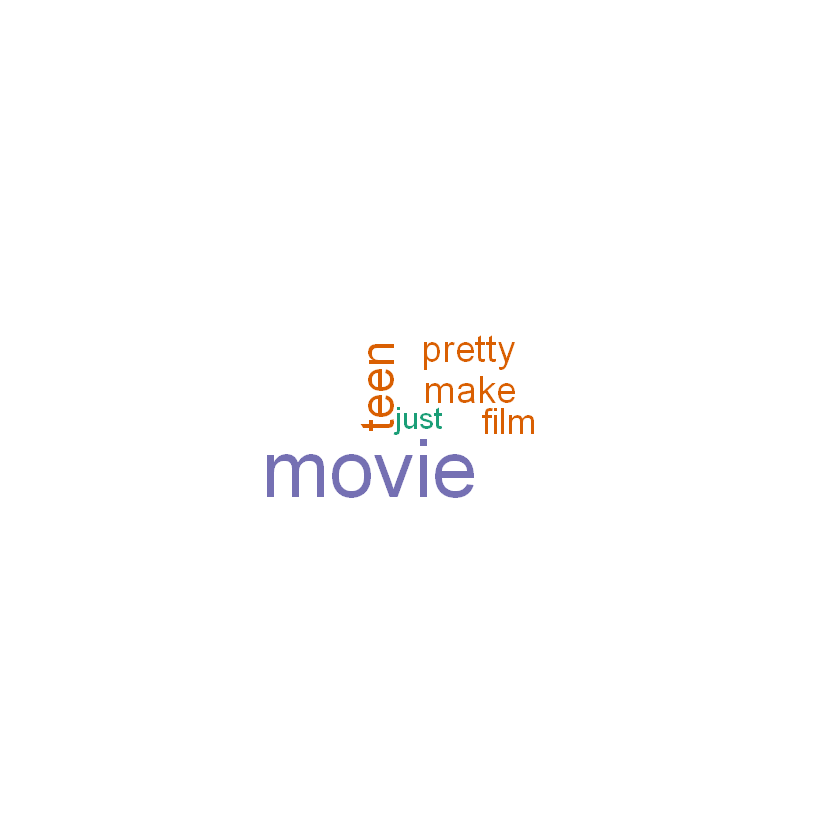

In [382]:
freq_neg_weighting = data.frame(sort(colSums(as.matrix(neg_weighting)), decreasing=TRUE))
wordcloud(rownames(freq_neg_weighting), freq_neg_weighting[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

We are going to combine the two text files as one to check and learning from their differences and similartity.

In [397]:
pos_neg <- rbind(neg_cleaning, pos_cleaning)

In [398]:
pos_neg = Corpus(VectorSource(pos_neg))

pos_neg_dtm <- DocumentTermMatrix(pos_neg)
pos_neg_dtm

<<DocumentTermMatrix (documents: 6, terms: 554)>>
Non-/sparse entries: 598/2726
Sparsity           : 82%
Maximal term length: 15
Weighting          : term frequency (tf)

In [399]:
inspect(pos_neg_dtm[,])

<<DocumentTermMatrix (documents: 6, terms: 554)>>
Non-/sparse entries: 598/2726
Sparsity           : 82%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs comic dont even film films get like make movie pretty
   1     0    2    3    5     3   3    3    5     6      5
   2     5    5    3    5     1   2    4    2     0      0
   3     0    0    0    0     0   0    0    0     0      0
   4     0    0    0    0     0   0    0    0     0      0
   5     0    0    0    0     0   0    0    0     0      0
   6     0    0    0    0     0   0    0    0     0      0


In [400]:
pos_neg_dtm = removeSparseTerms(pos_neg_dtm, 0.95)
pos_neg_dtm

<<DocumentTermMatrix (documents: 6, terms: 554)>>
Non-/sparse entries: 598/2726
Sparsity           : 82%
Maximal term length: 15
Weighting          : term frequency (tf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

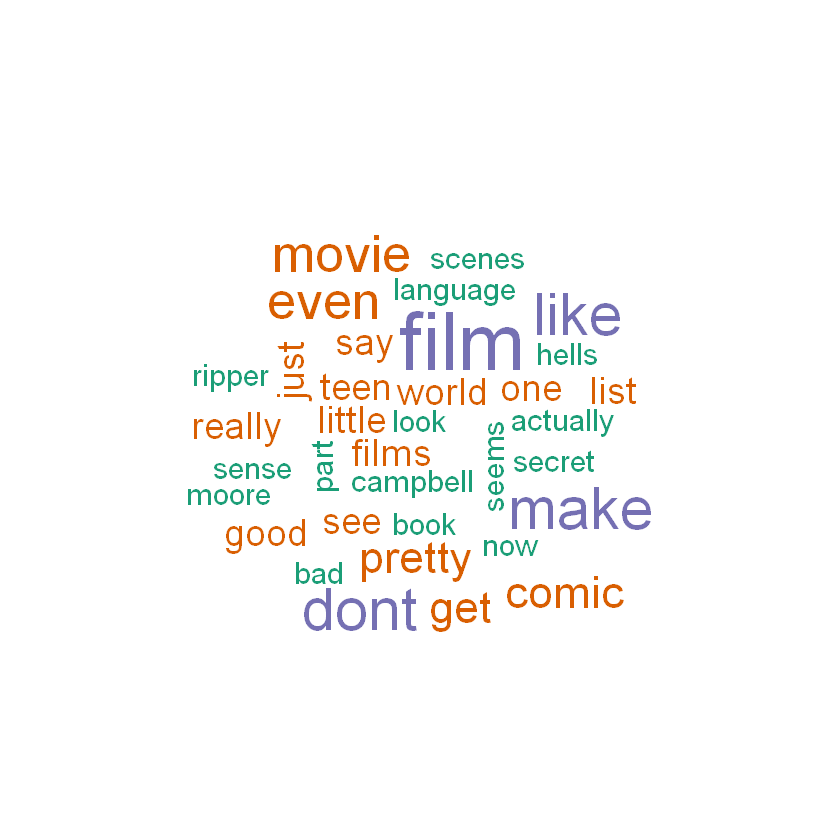

In [401]:
pos_neg_freq = data.frame(sort(colSums(as.matrix(pos_neg_dtm)), decreasing=TRUE))
wordcloud(rownames(pos_neg_freq), pos_neg_freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

In [408]:
findFreqTerms(dtm, 200)

character(0)

In [404]:
findFreqTerms(dtm2, 200)

character(0)

In [405]:
findFreqTerms(pos_neg_dtm, 200)

character(0)

# Thank You For Your Time